In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('S&P500_Yahoo_Finance.csv') ### need to ensure numbers are in numbers, not general or other formats in CSV
print(df)
### daily data from Yahoo Finance -- cont cpd mkt return SPRET is added

               Date      Open      High       Low    Close* Adj Close**  \
0      Feb 24, 2023  3,973.24  3,978.25  3,943.08  3,970.04    3,970.04   
1      Feb 23, 2023  4,018.60  4,028.30  3,969.19  4,012.32    4,012.32   
2      Feb 22, 2023  4,001.83  4,017.37  3,976.90  3,991.05    3,991.05   
3      Feb 21, 2023  4,052.35  4,052.35  3,995.19  3,997.34    3,997.34   
4      Feb 17, 2023  4,077.39  4,081.51  4,047.95  4,079.09    4,079.09   
...             ...       ...       ...       ...       ...         ...   
10875  Jan 08, 1980         0    109.29    106.29    108.95      108.95   
10876  Jan 07, 1980         0     107.8     105.8    106.81      106.81   
10877  Jan 04, 1980         0    107.08    105.09    106.52      106.52   
10878  Jan 03, 1980         0    106.08    103.26    105.22      105.22   
10879  Jan 02, 1980         0    108.43    105.29    105.76      105.76   

              Volume    SP_RET  
0      3,877,700,000 -0.010593  
1      3,952,940,000  0.005315  


In [2]:
df = df.reindex(index=df.index[::-1]) 
df.reset_index(inplace=True, drop=True)
print(df)
### if we just run df1=df[::-1] it inverts all columns including the index column

               Date      Open      High       Low    Close* Adj Close**  \
0      Jan 02, 1980         0    108.43    105.29    105.76      105.76   
1      Jan 03, 1980         0    106.08    103.26    105.22      105.22   
2      Jan 04, 1980         0    107.08    105.09    106.52      106.52   
3      Jan 07, 1980         0     107.8     105.8    106.81      106.81   
4      Jan 08, 1980         0    109.29    106.29    108.95      108.95   
...             ...       ...       ...       ...       ...         ...   
10875  Feb 17, 2023  4,077.39  4,081.51  4,047.95  4,079.09    4,079.09   
10876  Feb 21, 2023  4,052.35  4,052.35  3,995.19  3,997.34    3,997.34   
10877  Feb 22, 2023  4,001.83  4,017.37  3,976.90  3,991.05    3,991.05   
10878  Feb 23, 2023  4,018.60  4,028.30  3,969.19  4,012.32    4,012.32   
10879  Feb 24, 2023  3,973.24  3,978.25  3,943.08  3,970.04    3,970.04   

              Volume    SP_RET  
0         40,610,000       NaN  
1         50,480,000 -0.005119  


In [3]:
df=df.dropna()
print(df)

               Date      Open      High       Low    Close* Adj Close**  \
1      Jan 03, 1980         0    106.08    103.26    105.22      105.22   
2      Jan 04, 1980         0    107.08    105.09    106.52      106.52   
3      Jan 07, 1980         0     107.8     105.8    106.81      106.81   
4      Jan 08, 1980         0    109.29    106.29    108.95      108.95   
5      Jan 09, 1980         0    111.09    108.41    109.05      109.05   
...             ...       ...       ...       ...       ...         ...   
10875  Feb 17, 2023  4,077.39  4,081.51  4,047.95  4,079.09    4,079.09   
10876  Feb 21, 2023  4,052.35  4,052.35  3,995.19  3,997.34    3,997.34   
10877  Feb 22, 2023  4,001.83  4,017.37  3,976.90  3,991.05    3,991.05   
10878  Feb 23, 2023  4,018.60  4,028.30  3,969.19  4,012.32    4,012.32   
10879  Feb 24, 2023  3,973.24  3,978.25  3,943.08  3,970.04    3,970.04   

              Volume    SP_RET  
1         50,480,000 -0.005119  
2         39,130,000  0.012279  


In [4]:
### Select only the subperiod 3 Jan 2022 to 30 Dec 2022 for analysis (251 data points)
df1=df.iloc[10591:10842,]
print(df1)

               Date      Open      High       Low    Close* Adj Close**  \
10592  Jan 03, 2022  4,778.14  4,796.64  4,758.17  4,796.56    4,796.56   
10593  Jan 04, 2022  4,804.51  4,818.62  4,774.27  4,793.54    4,793.54   
10594  Jan 05, 2022  4,787.99  4,797.70  4,699.44  4,700.58    4,700.58   
10595  Jan 06, 2022  4,693.39  4,725.01  4,671.26  4,696.05    4,696.05   
10596  Jan 07, 2022  4,697.66  4,707.95  4,662.74  4,677.03    4,677.03   
...             ...       ...       ...       ...       ...         ...   
10838  Dec 23, 2022  3,815.11  3,845.80  3,797.01  3,844.82    3,844.82   
10839  Dec 27, 2022  3,843.34  3,846.65  3,813.22  3,829.25    3,829.25   
10840  Dec 28, 2022  3,829.56  3,848.32  3,780.78  3,783.22    3,783.22   
10841  Dec 29, 2022  3,805.45  3,858.19  3,805.45  3,849.28    3,849.28   
10842  Dec 30, 2022  3,829.06  3,839.85  3,800.34  3,839.50    3,839.50   

              Volume    SP_RET  
10592  3,831,020,000  0.006354  
10593  4,683,170,000 -0.000630  


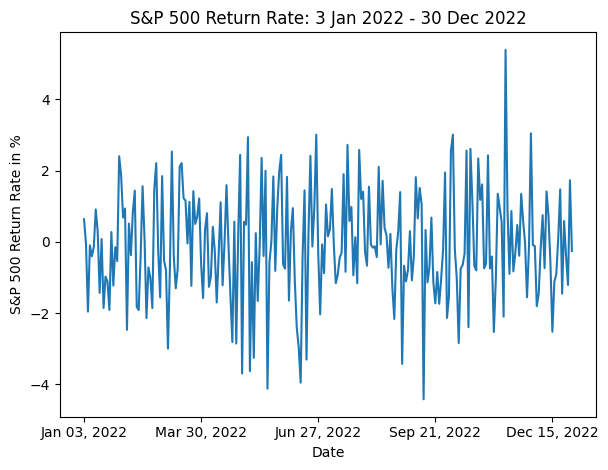

In [5]:
TIME=df1['Date']
SPRET=df1['SP_RET']*100
import matplotlib.pyplot as plt
# plotting the points 
plt.plot(TIME,SPRET)

# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('S&P 500 Return Rate in %')
  
# giving a title to my graph
plt.title('S&P 500 Return Rate: 3 Jan 2022 - 30 Dec 2022')

plt.tight_layout()
plt.xticks(np.arange(0, len(TIME)+2, 60)) ### xtick at every 20 steps to avoid label jamming
# function to show the plot
plt.show()

In [6]:
daily_volatility = SPRET.std()
monthly_volatility = np.sqrt(21) * daily_volatility
annual_volatility = np.sqrt(252) * daily_volatility

from tabulate import tabulate
print(tabulate([['S&P500 Index Return',daily_volatility,monthly_volatility,annual_volatility]],headers = 
['Daily Volatility %', 'Monthly Volatility %', 'Annual Volatility %'],tablefmt = 'fancy_grid',stralign='center',numalign =
'center',floatfmt=".2f"))

╒═════════════════════╤══════════════════════╤════════════════════════╤═══════════════════════╕
│                     │  Daily Volatility %  │  Monthly Volatility %  │  Annual Volatility %  │
╞═════════════════════╪══════════════════════╪════════════════════════╪═══════════════════════╡
│ S&P500 Index Return │         1.52         │          6.98          │         24.19         │
╘═════════════════════╧══════════════════════╧════════════════════════╧═══════════════════════╛


# Build GARCH Model

In [7]:
#!pip install arch
!pip3 install arch

In [8]:
from arch import arch_model
from arch.__future__ import reindexing

garch_model = arch_model(SPRET, p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
gm_result = garch_model.fit(disp='on') ### disp='off' turns off the iteration lines
print(gm_result.params)
print('\n')  ### print new line
gm_forecast = gm_result.forecast(horizon = 10)
print(gm_forecast.variance.head())   ### here by default prints only the next out-of-sample row

### Note: y_t∼N(μ,σ_t^2) and σ_t^2 = ω + α ϵ_t-1^2 + β σ_t−1^2
### For more variations in forecasting, 
###   see https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_forecasting.html

Iteration:      1,   Func. Count:      6,   Neg. LLF: 542.6446302721836
Iteration:      2,   Func. Count:     15,   Neg. LLF: 56321.092179364525
Iteration:      3,   Func. Count:     22,   Neg. LLF: 467.6549824616818
Iteration:      4,   Func. Count:     28,   Neg. LLF: 462.6545328430194
Iteration:      5,   Func. Count:     34,   Neg. LLF: 460.7998964256417
Iteration:      6,   Func. Count:     40,   Neg. LLF: 463.05201856441226
Iteration:      7,   Func. Count:     46,   Neg. LLF: 459.88445303765997
Iteration:      8,   Func. Count:     51,   Neg. LLF: 459.9104968686024
Iteration:      9,   Func. Count:     57,   Neg. LLF: 459.9100278899945
Iteration:     10,   Func. Count:     63,   Neg. LLF: 459.8347686323317
Iteration:     11,   Func. Count:     69,   Neg. LLF: 459.79482023693834
Iteration:     12,   Func. Count:     74,   Neg. LLF: 459.79479857822344
Iteration:     13,   Func. Count:     78,   Neg. LLF: 459.7947985789748
mu         -9.518151e-02
omega       7.865211e-02
alpha[1] 

In [9]:
Z=garch_model.fit()
Z.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 542.6446302721836
Iteration:      2,   Func. Count:     15,   Neg. LLF: 56321.092179364525
Iteration:      3,   Func. Count:     22,   Neg. LLF: 467.6549824616818
Iteration:      4,   Func. Count:     28,   Neg. LLF: 462.6545328430194
Iteration:      5,   Func. Count:     34,   Neg. LLF: 460.7998964256417
Iteration:      6,   Func. Count:     40,   Neg. LLF: 463.05201856441226
Iteration:      7,   Func. Count:     46,   Neg. LLF: 459.88445303765997
Iteration:      8,   Func. Count:     51,   Neg. LLF: 459.9104968686024
Iteration:      9,   Func. Count:     57,   Neg. LLF: 459.9100278899945
Iteration:     10,   Func. Count:     63,   Neg. LLF: 459.8347686323317
Iteration:     11,   Func. Count:     69,   Neg. LLF: 459.79482023693834
Iteration:     12,   Func. Count:     74,   Neg. LLF: 459.79479857822344
Iteration:     13,   Func. Count:     78,   Neg. LLF: 459.7947985789748
Optimization terminated successfully    (Exit mode 0)
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 SP_RET   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -459.795
Distribution:                  Normal   AIC:                           927.590
Method:            Maximum Likelihood   BIC:                           941.691
                                        No. Observations:                  251
Date:                Wed, Mar 13 2024   Df Residuals:                      250
Time:                        15:45:31   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0952  9.513e-02     -1.001      0.317 [ -0.282,9.127e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0787  7.724e-02      1.018      0.309   [-7.274e-02,  0.230]
alpha[1]   8.1328e-17  3.548e-02  2.292e-15      1.000 [-6.953e-02,6.953e-02]
beta[1]        0.9681  6.782e-02     14.274  3.168e-46      [  0.835,  1.101]
=============================================================================

Covariance estimator: robust
"""

Rolling Predictions: At this point, we have developed a GARCH model that can forecast S&P500 index return volatility. We can now put our model to the test using historical data from the n-period of time in a rolling prediction process.
Create a training set in a loop using the daily return rates from the ith day to the (i + trgset size)th day. 
In each loop, the current training set is used to train a GARCH (1,1) model with the parameters p and q set to 1. The current model forecasts next day volatility with a 1-time step (horizon=1 day). The result (standard deviation) is appended to the rolling predictions. The rolling window for estimation then shifts to trg set (i+1)th to (i + 1 + trgset size)th day. The next 1-time step ahead volatility is predicted and added to the rolling predictions variable.

In [10]:
df2=pd.DataFrame(SPRET)
print(df2)
SPRET=df2['SP_RET'] ### put back SPRET in a dataframe for rolling window app below

         SP_RET
10592  0.635385
10593 -0.062982
10594 -1.958327
10595 -0.096418
10596 -0.405844
...         ...
10838  0.585091
10839 -0.405783
10840 -1.209346
10841  1.731062
10842 -0.254397

[251 rows x 1 columns]


Text(0.5, 1.0, 'Rolling Prediction of daily S&P 500 return Volatility in %')

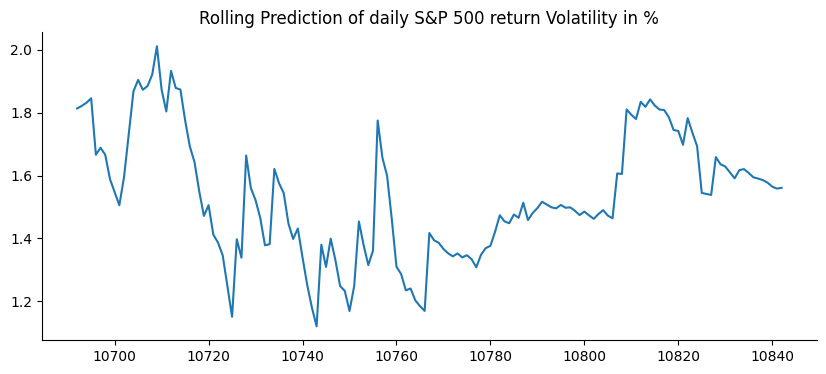

In [11]:
rolling_predictions = []
trgset_size = 100  
### uses estimation sample of size 100 starting on 3 jan 2022 - 25 May 2022. Then after estimation of GARCH model
###   predicts variance of next day 26 May 2022. Then uses next rolling sample 4 jan 2022 - 26 May 2022, and predicts
###   variance of 27 May 2022, and so on. Sq root of var or vola is then stored in 'rolling_predictions' vector.
###   Altogether 151 predictions that starts on 26 May 2022 and ends on 30 Dec 2022.

for i in range(151):
    train = SPRET[i:i+trgset_size]  ### train has length 200, i.e. SPRET[1:201] has length 200
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=df2['SP_RET'].index[-151:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction of daily S&P 500 return Volatility in %')

In [12]:
len(rolling_predictions)

151

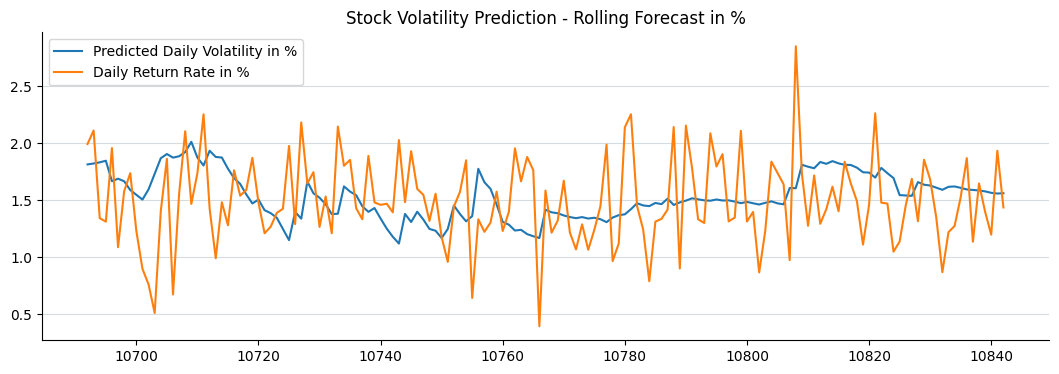

In [13]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)

plt.plot(rolling_predictions)
plt.plot(SPRET[-151:]*.25+1.5) 
### Affine-transformed to compare the trends (S&P500 return rates scales to visually compare with predicted vola)
plt.title('Stock Volatility Prediction - Rolling Forecast in %')
plt.legend(['Predicted Daily Volatility in %','Daily Return Rate in %'])

In [14]:
### There seems to be tendency for high (low) vola to accompany low (high) returns on average